In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df=pd.read_csv("train.csv")
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
131995,2017-12-31 22:45:00,2235.824452,1116.541777,0.000000,5
131996,2017-12-31 23:00:00,2372.073420,1239.023765,0.000000,5
131997,2017-12-31 23:15:00,2339.986234,1155.845219,0.000000,5
131998,2017-12-31 23:30:00,2307.052698,1175.130243,0.000000,5
131999,2017-12-31 23:45:00,2322.664247,1187.947272,9.424013,5


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df = df.set_index(['timestamp'])
df.index

DatetimeIndex(['2017-04-01 00:00:00', '2017-04-01 00:15:00',
               '2017-04-01 00:30:00', '2017-04-01 00:45:00',
               '2017-04-01 01:00:00', '2017-04-01 01:15:00',
               '2017-04-01 01:30:00', '2017-04-01 01:45:00',
               '2017-04-01 02:00:00', '2017-04-01 02:15:00',
               ...
               '2017-12-31 21:30:00', '2017-12-31 21:45:00',
               '2017-12-31 22:00:00', '2017-12-31 22:15:00',
               '2017-12-31 22:30:00', '2017-12-31 22:45:00',
               '2017-12-31 23:00:00', '2017-12-31 23:15:00',
               '2017-12-31 23:30:00', '2017-12-31 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=132000, freq=None)

In [ ]:
df['year']= df.index.year
df['month']= df.index.month
df['weekday']= df.index.weekday_name
df.head()

,main_meter,sub_meter_1,sub_meter_2,building_number,year,month,weekday
timestamp,,,,,,,
2017-04-01 00:00:00,2898.969633,1390.244624,0.000000,1,2017,4,Saturday
2017-04-01 00:15:00,2531.896894,1087.313897,0.000000,1,2017,4,Saturday
2017-04-01 00:30:00,2171.649138,695.625737,0.484790,1,2017,4,Saturday
2017-04-01 00:45:00,2207.299159,615.496571,1.317875,1,2017,4,Saturday
2017-04-01 01:00:00,2839.441067,1071.573744,0.000000,1,2017,4,Saturday


In [ ]:
pip install calmap

In [ ]:
import calmap

In [ ]:
B1=df[df['building_number']==1]
B2=df[df['building_number']==2]
B3=df[df['building_number']==3]
B4=df[df['building_number']==4]
B5=df[df['building_number']==5]

#B1 =B1.asfreq(freq='15T',method='ffill')
B1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26400 entries, 2017-04-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 7 columns):
main_meter         26400 non-null float64
sub_meter_1        26400 non-null float64
sub_meter_2        26400 non-null float64
building_number    26400 non-null int64
year               26400 non-null int64
month              26400 non-null int64
weekday            26400 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#df = pd.read_csv('train.csv', parse_dates=['timestamp'],date_parser=dateparse)

In [ ]:
import matplotlib.dates as mdates


/usr/local/lib/python3.6/dist-packages/calmap/__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 1280x800 with 0 Axes>

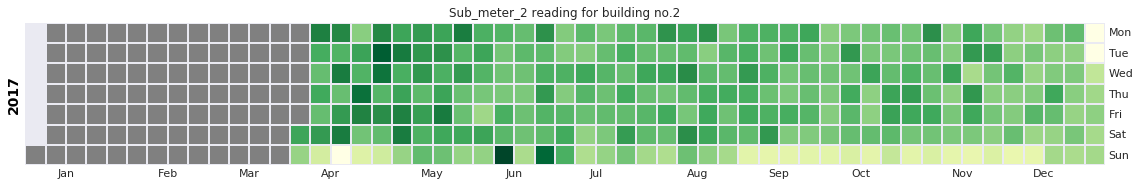

In [ ]:
import calmap


# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(B2['sub_meter_2'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14},cmap='YlGn',fillcolor='grey', subplot_kws={'title':'Sub_meter_2 reading for building no.2'})
plt.show()

In [ ]:
b1= B1.resample('H').sum()
b1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6600 entries, 2017-04-01 00:00:00 to 2017-12-31 23:00:00
Freq: H
Data columns (total 6 columns):
main_meter         6600 non-null float64
sub_meter_1        6600 non-null float64
sub_meter_2        6600 non-null float64
building_number    6600 non-null int64
year               6600 non-null int64
month              6600 non-null int64
dtypes: float64(3), int64(3)
memory usage: 360.9 KB


/usr/local/lib/python3.6/dist-packages/calmap/__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


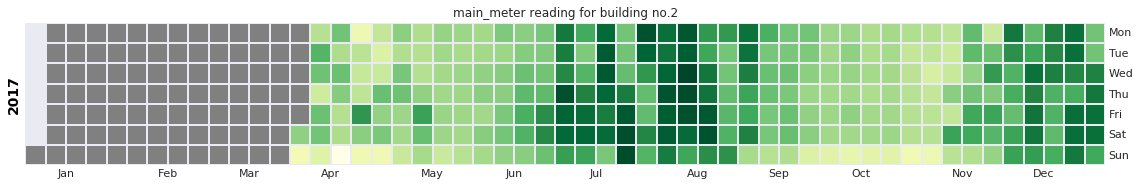

In [ ]:
calmap.calendarplot(B2['main_meter'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14},cmap='YlGn',fillcolor='grey', subplot_kws={'title':'main_meter reading for building no.2'})
plt.show()



/usr/local/lib/python3.6/dist-packages/calmap/__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


<Figure size 1280x800 with 0 Axes>

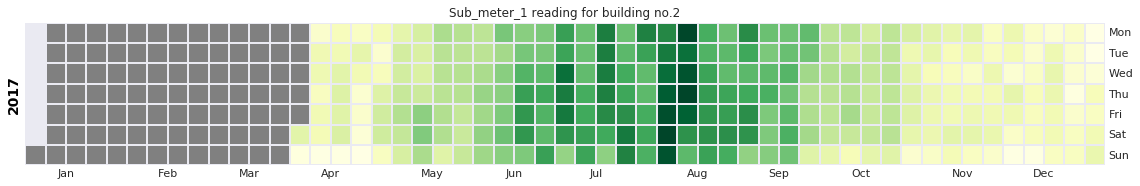

In [ ]:
# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(B2['2017']['sub_meter_1'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14},cmap='YlGn',fillcolor='grey', subplot_kws={'title':'Sub_meter_1 reading for building no.2'})
plt.show()

In [ ]:
pip install tbats

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 1.5MB 11.7MB/s 


<function matplotlib.pyplot.show(*args, **kw)>

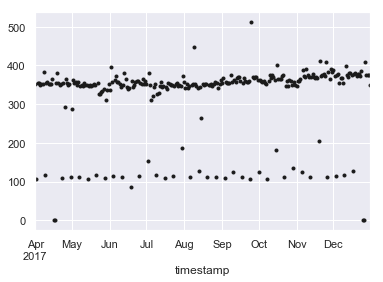

In [ ]:
b1['sub_meter_2'].plot(style='k.')
plt.show

In [ ]:
b1= B1.resample('H').sum()
X = b1['main_meter'].values
train, test = X[1:-1440], X[-1440:]

In [ ]:
from tbats import TBATS, BATS
estimator = TBATS(seasonal_periods=(24,168))
model=estimator.fit(train)
y_forecast=model.forecast(steps=1440)

Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [ 24. 168.]
Seasonal harmonics [11  6]
ARMA errors (p, q): (5, 2)
Box-Cox Lambda 0.184658
Smoothing (Alpha): 0.457742
Seasonal Parameters (Gamma): [-4.54049232e-05  2.31811201e-05  3.83660853e-05 -1.71887949e-05]
AR coefficients [ 3.83660853e-05 -1.71887949e-05 -2.26703057e-01  7.22073852e-02
 -2.53806252e-01]
MA coefficients [ 0.36345687 -0.0120584 ]
Seed vector [ 2.64612944e+01 -1.96621030e+00 -3.25894178e-01  2.15528870e-01
 -5.06560953e-02  1.34545506e-01  4.04805376e-02 -5.34588145e-02
 -7.61382966e-02 -4.32690423e-02 -2.68750278e-02  4.65975279e-02
  6.22275810e-01  1.12689374e-01 -4.77104220e-01 -1.50444181e-01
  1.05689624e-01  1.93261851e-01 -1.47646344e-02  1.14667729e-01
  9.45189094e-03 -1.06623042e-01 -5.97657538e-03 -4.23011510e-02
  3.38526679e-01  2.19572897e-01 -2.29312500e-01 -2.17346886e-01
  6.97774949e-02 -4.48868077e-01 -1.63472114e-01  2.92489162e-01
  2.25647269e-01 -9.98386266e-02 -2.3

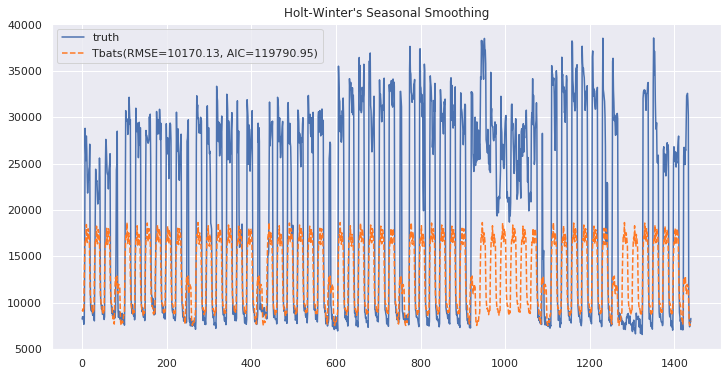

In [ ]:
print(model.summary())
sse1 = np.sqrt(np.mean(np.square(test -y_forecast )))


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test, label='truth');
ax.plot(y_forecast, linestyle='--', color='#ff7823', label="Tbats(RMSE={:0.2f}, AIC={:0.2f})".format(sse1, model.aic));

ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) 

Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: [ 96. 672.]
Seasonal harmonics [26  6]
ARMA errors (p, q): (4, 5)
Box-Cox Lambda 0.229845
Smoothing (Alpha): 0.878377
Trend (Beta): -0.097638
Damping Parameter (Phi): 0.893631
Seasonal Parameters (Gamma): [-8.55051878e-07  1.33073448e-05  5.15913900e-06  1.60803177e-06]
AR coefficients [ 5.15913900e-06  1.60803177e-06 -2.70408465e-02  2.47597728e-02]
MA coefficients [ 0.07935856 -0.06835143 -0.06293614 -0.03458719 -0.02025902]
Seed vector [ 2.40196879e+01  7.23806960e-02 -2.27922360e+00 -3.59119630e-01
  5.81654715e-01  1.28614935e-01 -1.09498667e-01 -1.67253789e-01
  9.00533686e-02 -2.38802820e-02 -8.66970837e-03  2.65433360e-02
 -1.61694853e-02 -1.73425383e-01 -7.58341026e-02  5.26760600e-02
  7.78000871e-02 -9.41782967e-03 -7.26569972e-02  3.77671908e-02
  7.27190519e-03 -5.70308248e-03 -1.70843254e-02  2.48716035e-04
  3.11565777e-02  1.49275238e-01 -7.08630068e-03  3.00826368e-03
  1.89750612e-02 -9.6132304

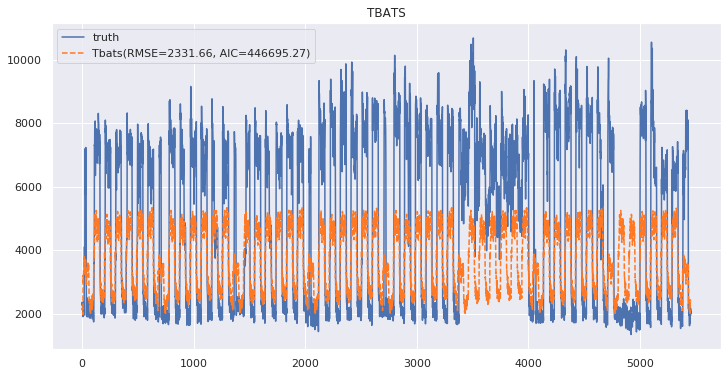

In [ ]:
X = B1['main_meter'].values
train, test = X[1:-5460], X[-5460:]
from tbats import TBATS, BATS
estimator = TBATS(seasonal_periods=(96,672))
model=estimator.fit(train)
y_forecast=model.forecast(steps=5460)
print(model.summary())
sse1 = np.sqrt(np.mean(np.square(test -y_forecast )))


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test, label='truth');
ax.plot(y_forecast, linestyle='--', color='#ff7823', label="Tbats(RMSE={:0.2f}, AIC={:0.2f})".format(sse1, model.aic));

ax.legend();
ax.set_title("TBATS");


In [ ]:
Sb1=B1.iloc[:-5460,:]
X = Sb1['main_meter'].values
train, test = X[1:-960], X[-960:]
from tbats import TBATS, BATS
estimator = TBATS(seasonal_periods=(96,672))
model=estimator.fit(train)
y_forecast=model.forecast(steps=960)
print(model.summary())
sse1 = np.sqrt(np.mean(np.square(test -y_forecast )))


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test, label='truth');
ax.plot(y_forecast, linestyle='--', color='#ff7823', label="Tbats(RMSE={:0.2f}, AIC={:0.2f})".format(sse1, model.aic));

ax.legend();
ax.set_title("TBATS");

/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.6/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) 

In [ ]:
plt.show()

NameError: ignored

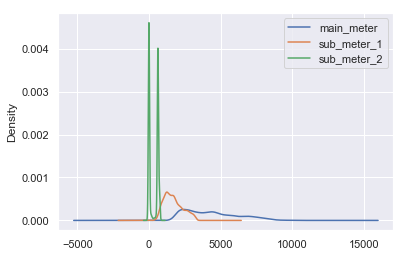

In [ ]:
B1.plot(kind = 'kde')

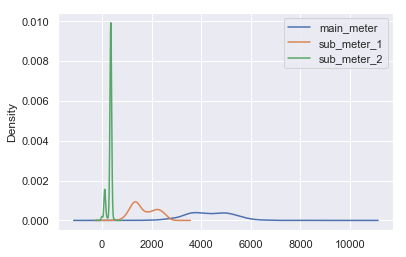

In [ ]:
b1.plot(kind = 'kde')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


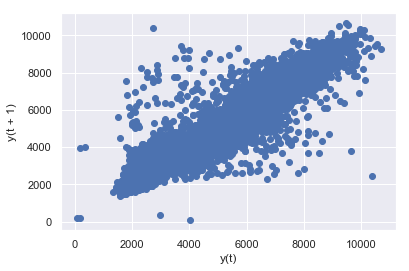

In [ ]:
from pandas.plotting import lag_plot
lag_plot(B1.main_meter)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


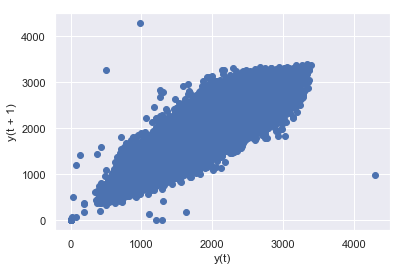

In [ ]:
from pandas.plotting import lag_plot
lag_plot(B1.sub_meter_1)
plt.show()

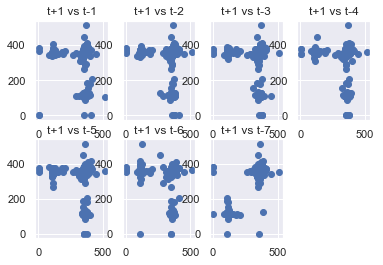

In [ ]:
from pandas import DataFrame
from pandas import concat
from pandas.plotting import scatter_matrix

values = DataFrame(b1['sub_meter_2'].values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

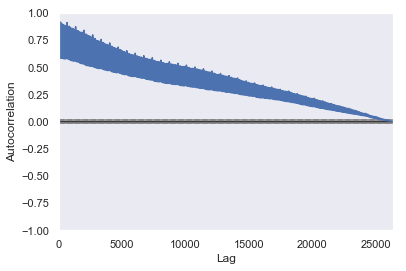

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(B1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

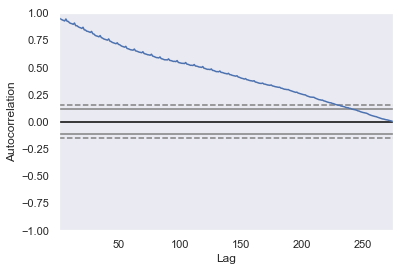

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(b1)
plt.show

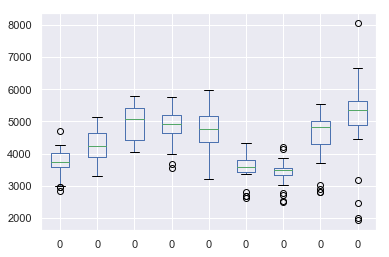

In [ ]:
from pandas import Grouper
groups = b1['main_meter'].groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.boxplot()
ax.set_ylabel('k')

plt.show()

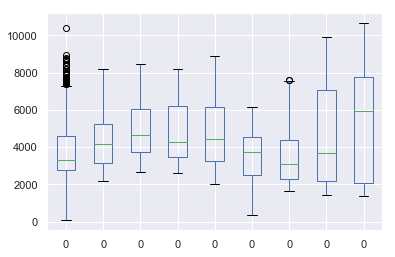

In [ ]:
from pandas import Grouper
groups = B1['main_meter'].groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.boxplot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(b1['main_meter'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.024110
p-value: 0.276103


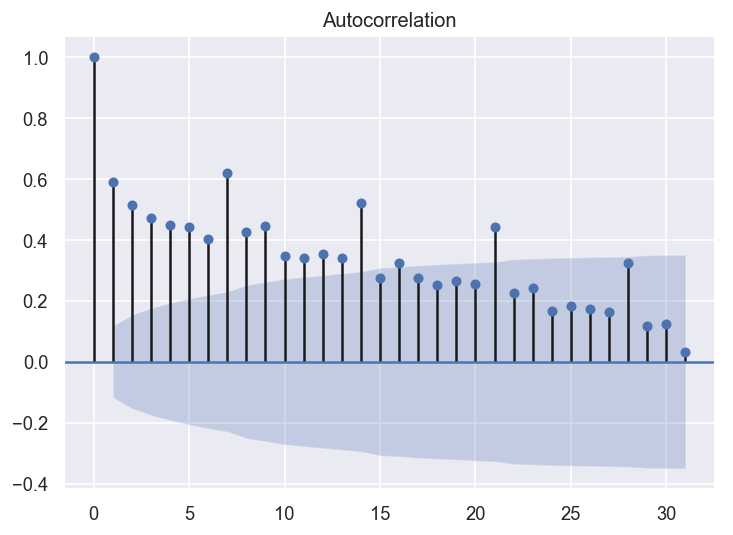

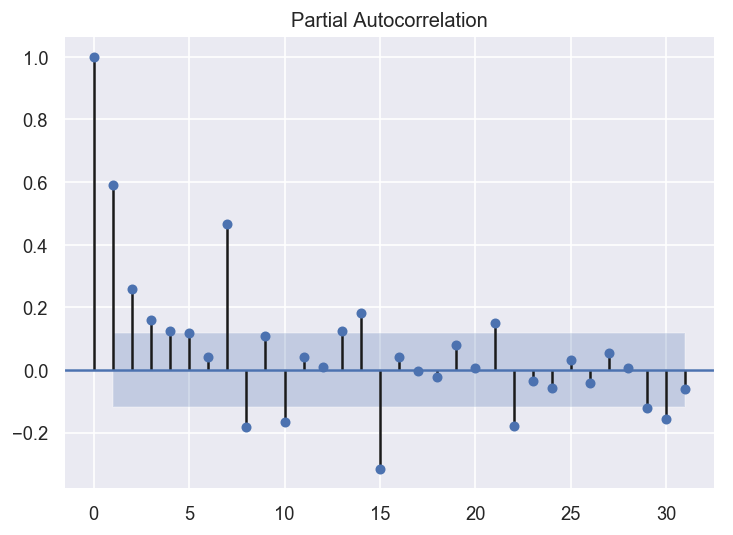

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':120})



plot_acf(b1['main_meter'],lags=31 )
plot_pacf(b1['main_meter'],lags=31)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

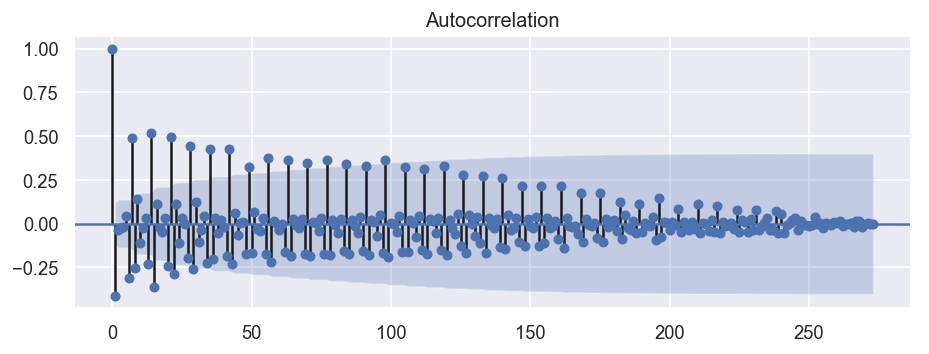

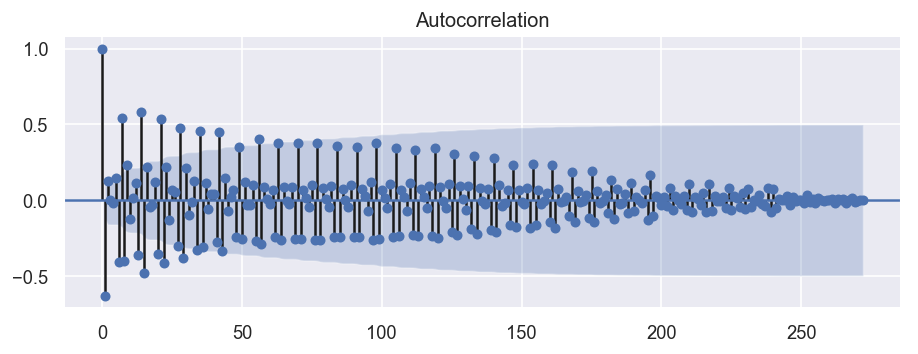

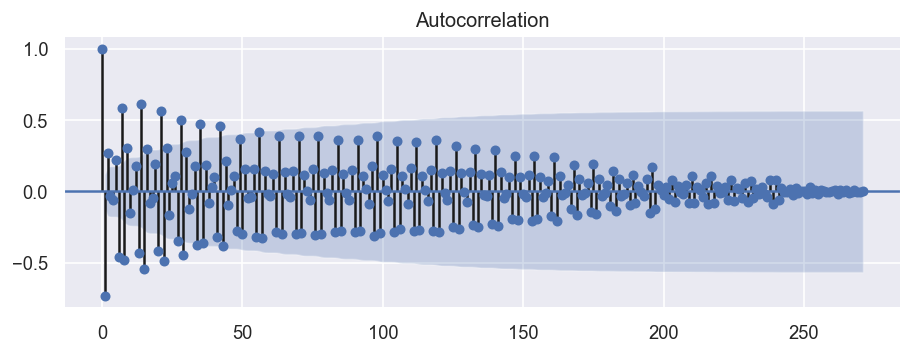

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


plot_acf(b1['main_meter'].diff().dropna())
plot_acf(b1['main_meter'].diff().diff().dropna())
plot_acf(b1['main_meter'].diff().diff().diff().dropna())
plt.show


E:\laptop softwares\anoconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


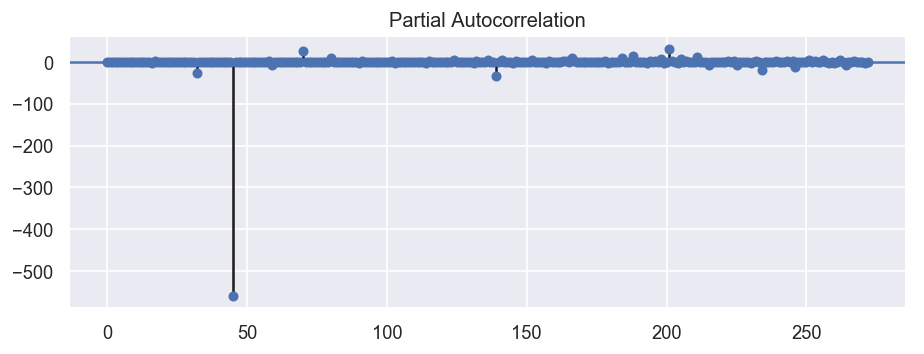

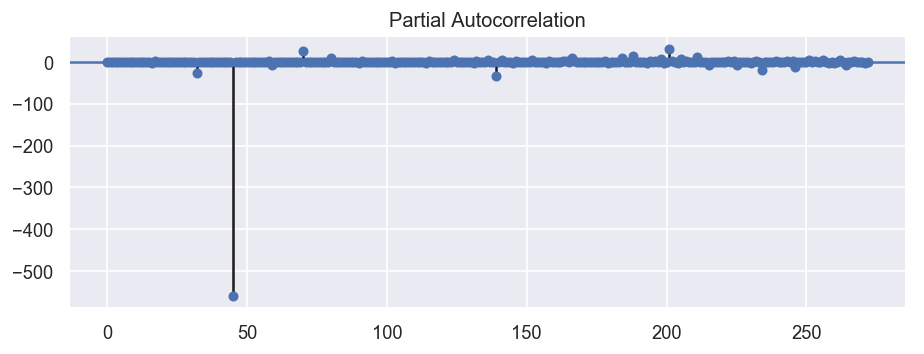

In [ ]:
plot_pacf(b1['main_meter'].diff().diff().dropna())

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.diff().rolling(7).mean() 

    rolstd =  timeseries.diff().rolling(7).std() 

    #Plot rolling statistics:
    orig = plt.plot(timeseries.diff(), color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
   
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

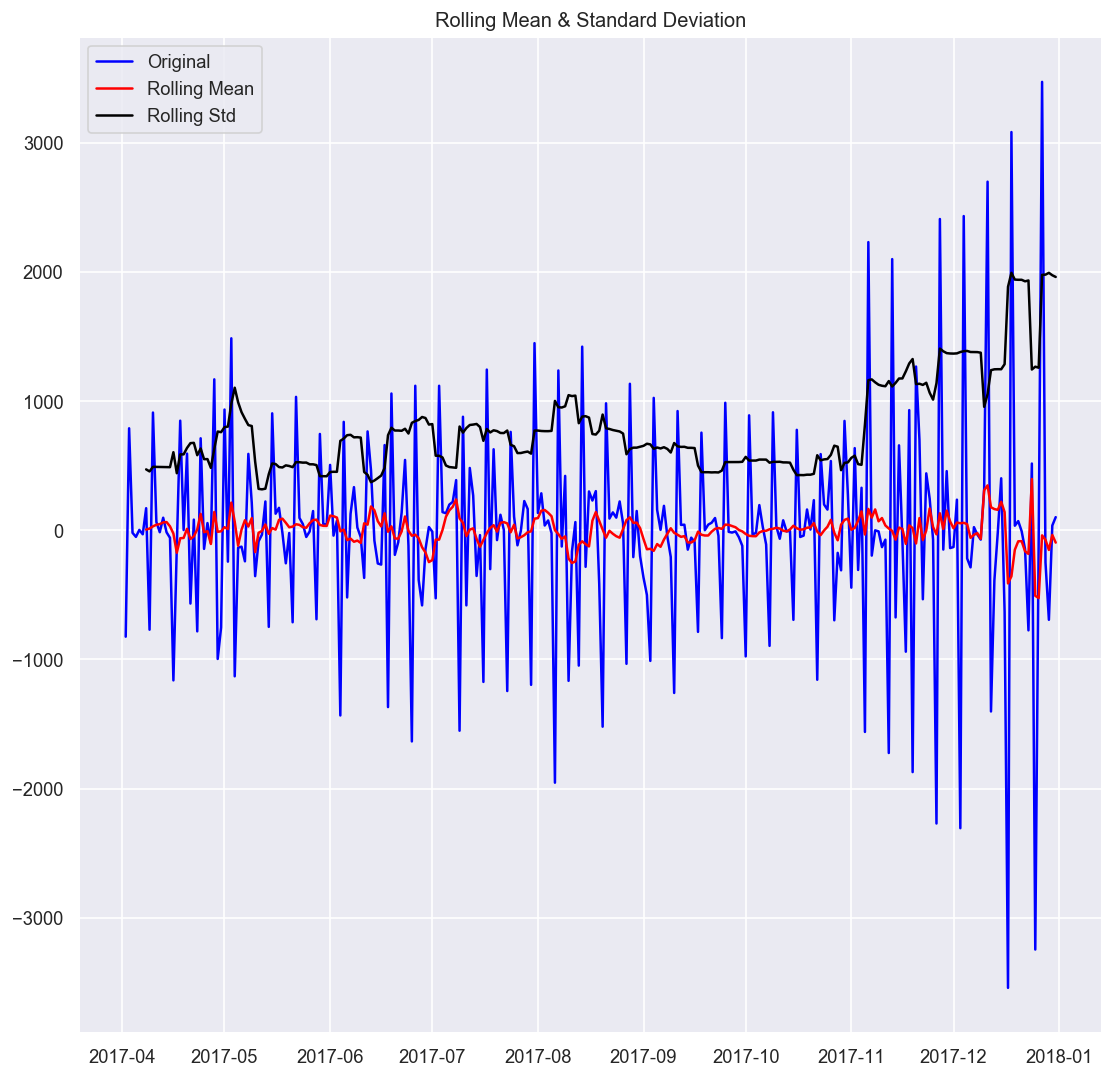

Test Statistic                  -2.024110
p-value                          0.276103
#Lags Used                      15.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [ ]:
test_stationarity(b1['main_meter'])

<function matplotlib.pyplot.show>

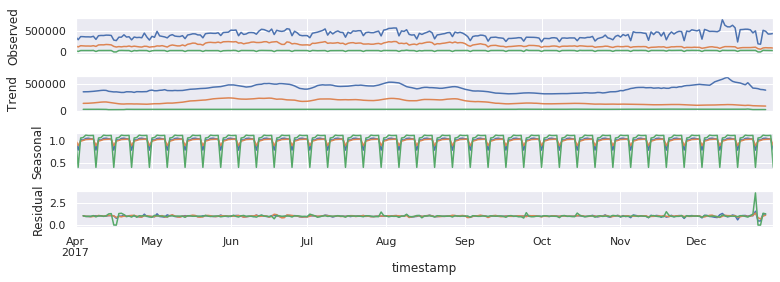

In [ ]:

decomposition = sm.tsa.seasonal_decompose(b1,model='multiplicative')
fig = decomposition.plot()
plt.show

<function matplotlib.pyplot.show>

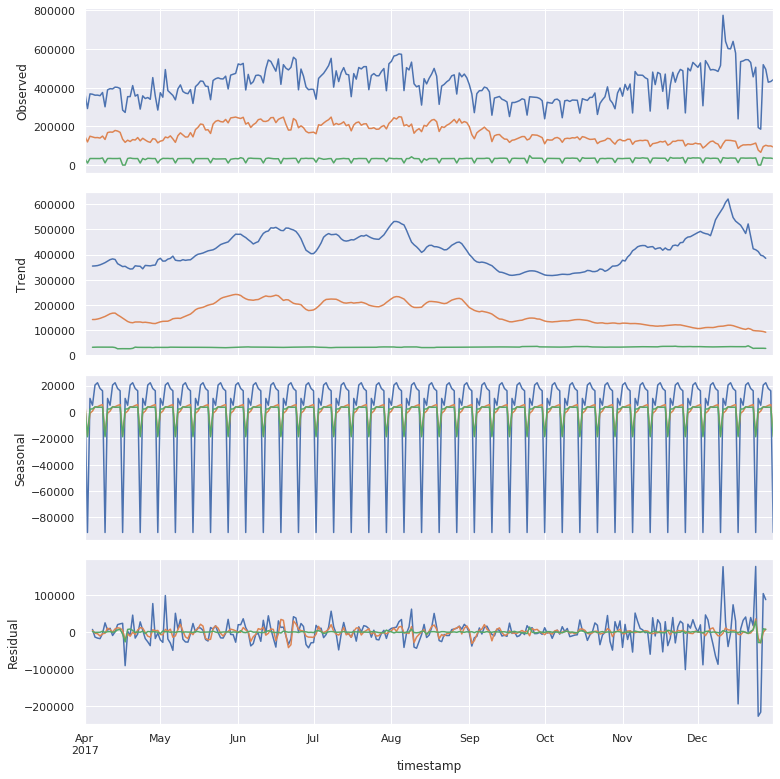

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11
decomposition = sm.tsa.seasonal_decompose(b1,model='additive')
fig = decomposition.plot()
plt.show

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(B1.main_meter, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.main_meter   No. Observations:                26399
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -199095.619
Method:                       css-mle   S.D. of innovations            456.162
Date:                Mon, 03 Feb 2020   AIC                         398201.238
Time:                        13:30:31   BIC                         398242.143
Sample:                    04-01-2017   HQIC                        398214.443
                         - 12-31-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0167      2.817     -0.006      0.995      -5.538       5.504
ar.L1.D.main_meter     0.4320      0.039     11.178      0.000       0.356       0.508
ar.L2.D.main_meter  

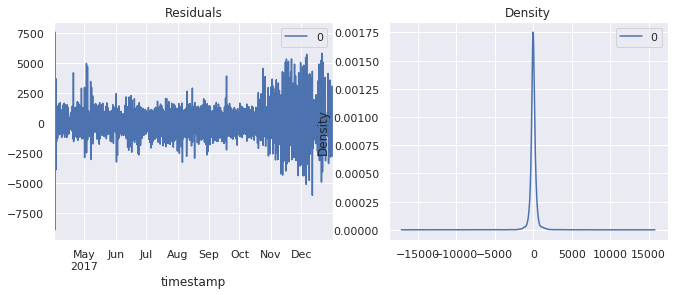

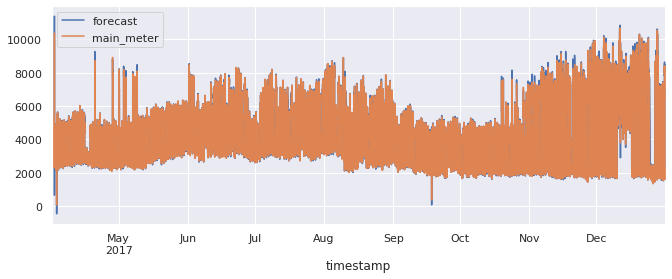

In [ ]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
X = b1['main_meter'].diff().values
train, test = X[1:len(X)-1440], X[len(X)-1440:]
model = ExponentialSmoothing(train, trend="add", seasonal="add",seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
fit = model.fit()
pred = fit.forecast(1440)
fit2 = model2.fit()
pred2 = fit2.forecast(1440)

sse1 = np.sqrt(np.mean(np.square(test - pred)))
sse2 = np.sqrt(np.mean(np.square(test - pred2)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot( train[:200]);
ax.plot(test, label='truth');
ax.plot(pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

Test MSE: 930493.610


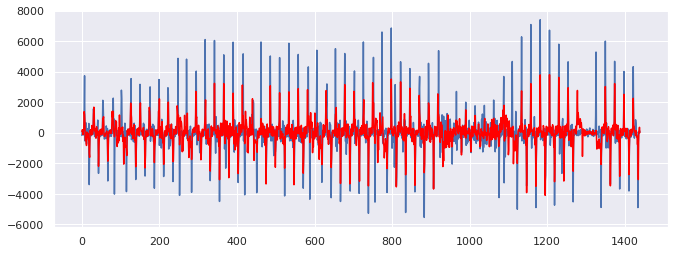

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset
X = b1['main_meter'].diff().values
train, test = X[1:len(X)-1440], X[len(X)-1440:]

# train autoregression
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Text(0.5, 1.0, 'sub_meter_2')

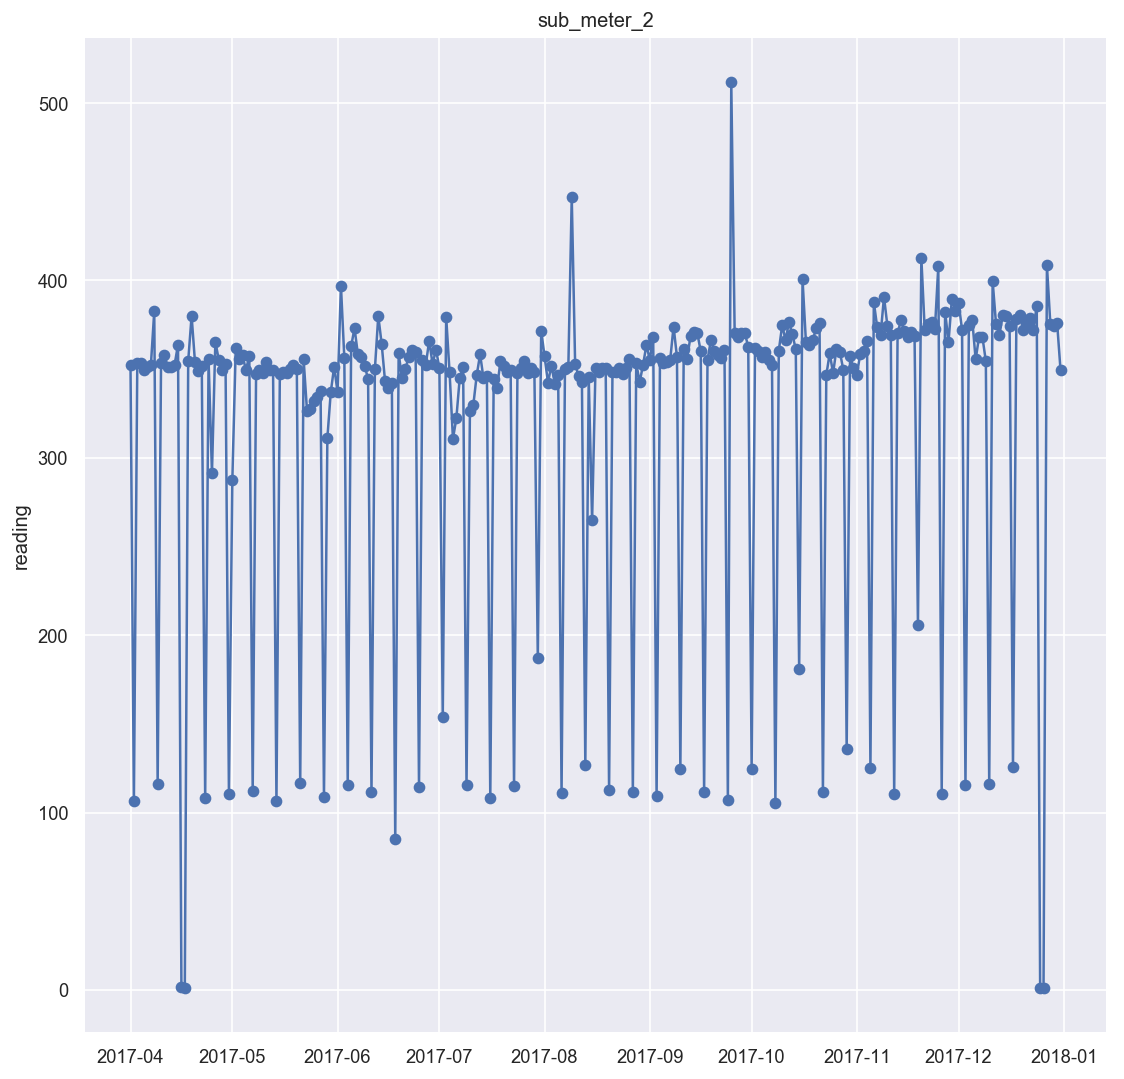

In [ ]:
fig, ax = plt.subplots()
ax.plot(b1.loc[b1.index,'sub_meter_2'], marker='o', linestyle='-')
ax.set_ylabel('reading')
ax.set_title('sub_meter_2')
# Set x-axis major ticks to weekly interval, on Mondays



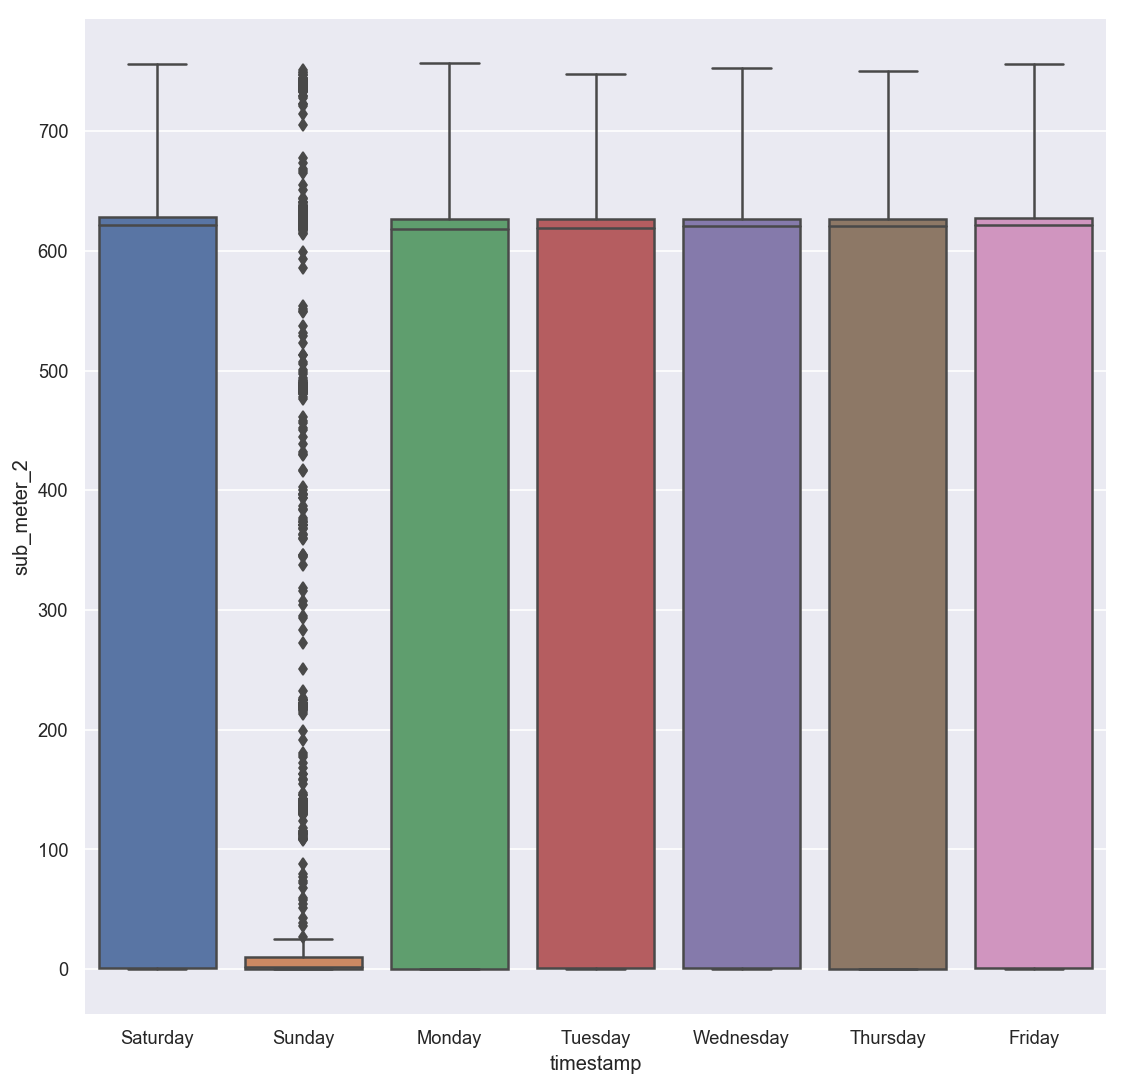

In [ ]:
sns.boxplot(data=B1, x=B1.index.weekday_name, y='sub_meter_2');

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


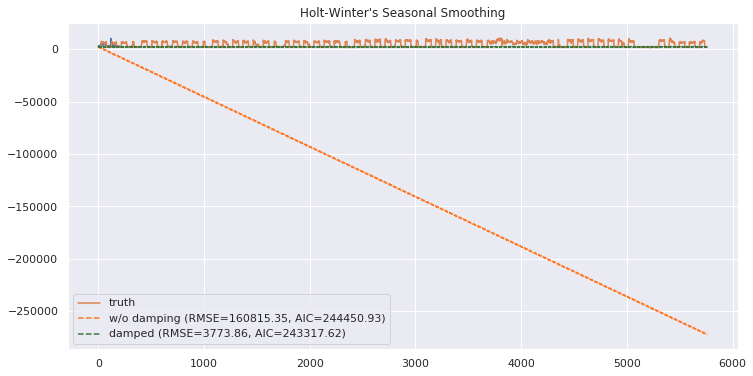

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
X = B1['main_meter'].values
train, test = X[:-5760], X[-5760:]
model = ExponentialSmoothing(train, trend="add", seasonal="add",seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
fit = model.fit()
pred = fit.forecast(5760)
fit2 = model2.fit()
pred2 = fit2.forecast(5760)

sse1 = np.sqrt(np.mean(np.square(test - pred)))
sse2 = np.sqrt(np.mean(np.square(test - pred2)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot( train[:200]);
ax.plot(test, label='truth');
ax.plot(pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");